### Problem Statement: 
The objective of this project is to identify the most significant employee performance indicators for awarding bonuses and recommending professional development using Principal Component Analysis (PCA) on the IBM HR Analytics Employee Attrition & Performance dataset. By reducing the dimensionality of the data while retaining as much variability as possible, we aim to pinpoint which attributes best predict employee performance for policy-making in HR management.

STEP 1: Data Setup and Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

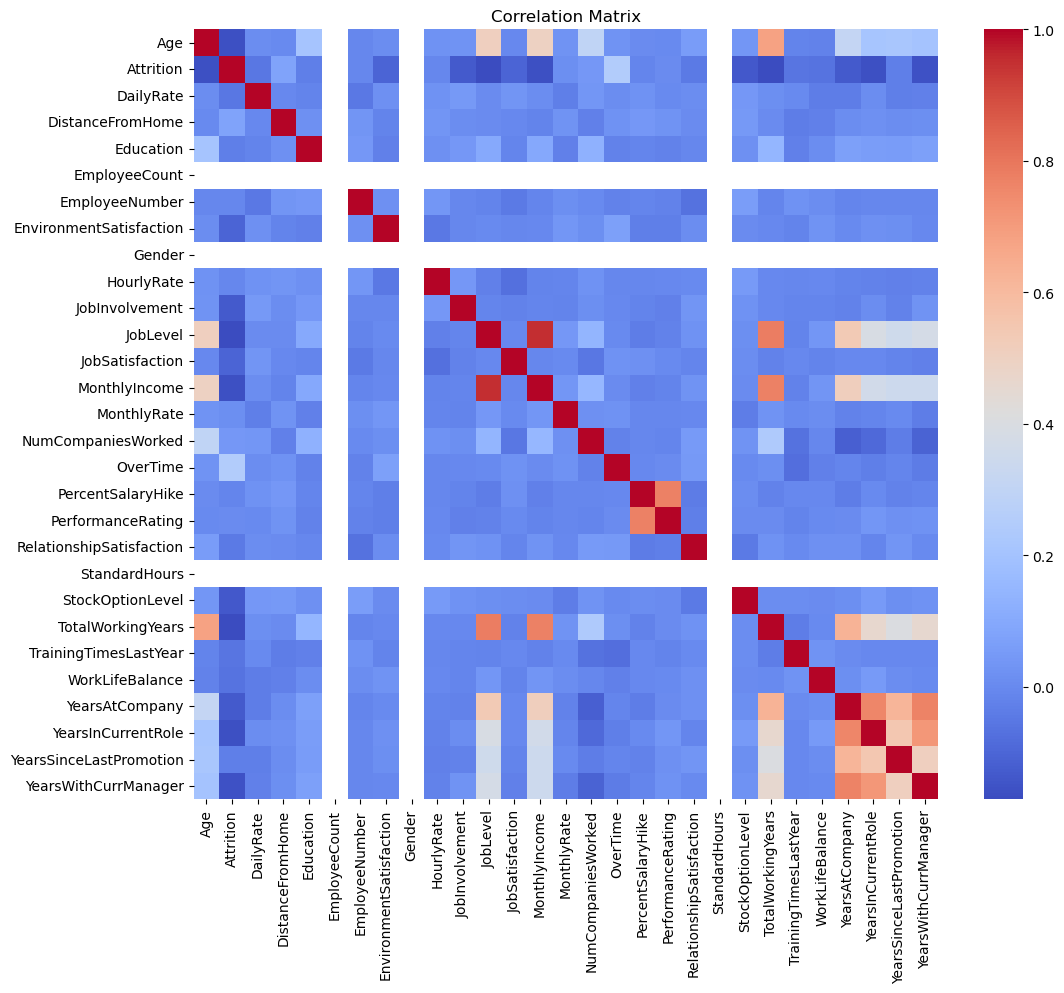

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import stats

# Load the dataset
df = pd.read_csv('HR-Employee-Data.csv')

# Display basic info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Handle categorical data by encoding
# For binary categorical columns (like 'Yes'/'No'), map them to 0 and 1
for column in df.columns:
    if df[column].dtype == 'object':
        if df[column].nunique() == 2:  # If the column has only two unique values, it's binary
            df[column] = df[column].map({'Yes': 1, 'No': 0})
        else:
            # For columns with more than 2 categories, use one-hot encoding
            df = pd.get_dummies(df, columns=[column], drop_first=True)

# Now, compute the correlation matrix only on numeric data
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Increased size for better visibility
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


STEP 2: Preliminary Statistical Analysis

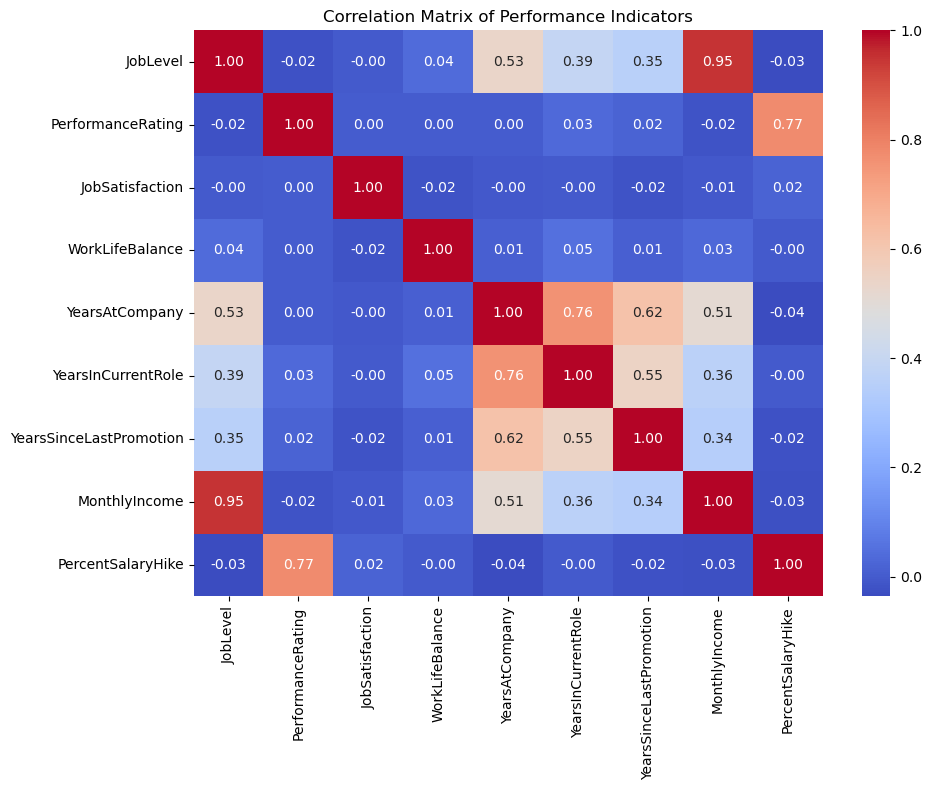


Descriptive Statistics of Performance Indicators:
          JobLevel  PerformanceRating  JobSatisfaction  WorkLifeBalance  \
count  1470.000000        1470.000000      1470.000000      1470.000000   
mean      2.063946           3.153741         2.728571         2.761224   
std       1.106940           0.360824         1.102846         0.706476   
min       1.000000           3.000000         1.000000         1.000000   
25%       1.000000           3.000000         2.000000         2.000000   
50%       2.000000           3.000000         3.000000         3.000000   
75%       3.000000           3.000000         4.000000         3.000000   
max       5.000000           4.000000         4.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.000000   
mean         7.008163            4.229252                 2.187755   
std          6.126525            3.623137                 3.222

In [3]:
# Create a subset of performance-related indicators
performance_columns = ['JobLevel', 'PerformanceRating', 'JobSatisfaction', 
                      'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                      'YearsSinceLastPromotion', 'MonthlyIncome', 'PercentSalaryHike']
data_perf = df[performance_columns]

# Compute correlation matrix
cor_matrix = data_perf.corr()

# Visualize using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Performance Indicators")
plt.tight_layout()
plt.show()

# Display basic statistics of performance indicators
print("\nDescriptive Statistics of Performance Indicators:")
print(data_perf.describe())

STEP 3: PCA Prerequisites and Assumptions Testing

In [6]:
# Import additional packages
from factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import calculate_kmo
from scipy.stats import stats

# Standardize the data
scaler = StandardScaler()
data_perf_scaled = scaler.fit_transform(data_perf)
data_perf_scaled = pd.DataFrame(data_perf_scaled, columns=data_perf.columns)

# Test 1: Batlett's Test for Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_perf)
print("\nBartlett's Test of Sphericity:")
print(f"Chi-Square value: {chi_square_value:.2f}")
print(f"p-value: {p_value:.5f}")

# Test 2: Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(data_perf)
print("\nKMO Test Results:")
print(f"KMO Score: {kmo_model:.3f}")  # Only print the model score

# Test 3: Determinant Check
determinant = np.linalg.det(data_perf.corr())
print("\nDeterminant of Correlation Matrix:", determinant)

# Additional Check: Verify data is suitable for PCA
print("\nData Suitability for PCA Summary:")
print("1. Bartlett's Test of Sphericity:", "Suitable" if p_value < 0.05 else "Not Suitable")
print("2. KMO Test:", "Suitable" if kmo_model > 0.6 else "Not Suitable")
print("3. Determinant of Correlation Matrix:", "Suitable" if determinant > 0.00001 else "Not Suitable")


Bartlett's Test of Sphericity:
Chi-Square value: 7280.37
p-value: 0.00000

KMO Test Results:
KMO Score: 0.658

Determinant of Correlation Matrix: 0.0069502802045814825

Data Suitability for PCA Summary:
1. Bartlett's Test of Sphericity: Suitable
2. KMO Test: Suitable
3. Determinant of Correlation Matrix: Suitable


# Interpretation of Results
1. Bartlett's Test of Sphericity(0.000):
- If p-value < 0.05, the data is suitable for PCA.
- If p-value >= 0.05, the data is not suitable for PCA.
- There are significant relationships between the variables, which is excellent for PCA.

2. KMO Test(0.658):
- If KMO score > 0.6, the data is suitable for PCA.
- If KMO score <= 0.6, the data is not suitable for PCA.
- The score of 0.658 is above the minimum threshold (0.6) but is in the "mediocre" range. This suggests that while PCA is possible, the shared variance among variables is not particularly strong.

3. Determinant of Correlation Matrix(0.00001):
- If determinant > 0.00001, the data is suitable for PCA.
- If determinant <= 0.00001, the data is not suitable for PCA.
- The score of (0.00001) indicates that while there is multicollinearity (as expected and desired for PCA), it's not at a problematic level. The matrix is invertible and suitable for factor analysis.



STEP 4: Perform Principal Component Analysis


Variance Explained by Each Component:
 Component  Individual_Explained_Variance  Cumulative_Explained_Variance
         1                       0.351860                       0.351860
         2                       0.197321                       0.549181
         3                       0.121476                       0.670657
         4                       0.113181                       0.783838
         5                       0.108954                       0.892792
         6                       0.052851                       0.945643
         7                       0.025034                       0.970677
         8                       0.023859                       0.994536
         9                       0.005464                       1.000000


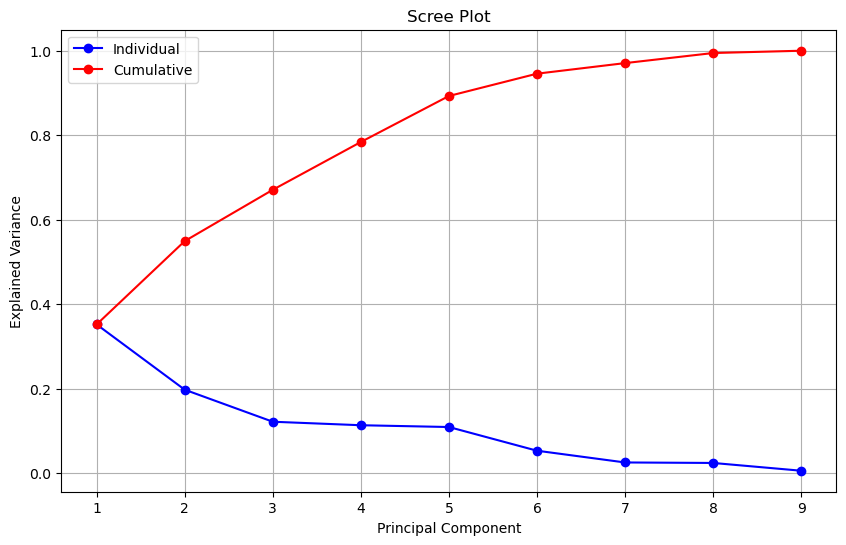

In [8]:
from sklearn.decomposition import PCA

# Initialize PCA (start with same number of components as original features)
n_components = len(performance_columns)
pca = PCA(n_components=n_components)

# Fit and Transform the data
pca_result = pca.fit_transform(data_perf_scaled)

# Calculate variance and cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create a DataFrame with explained variance 
variance_df = pd.DataFrame({
    'Component': range(1, n_components + 1),
    'Individual_Explained_Variance': explained_variance_ratio,
    'Cumulative_Explained_Variance': cumulative_variance
})

# Display variance explained by each component
print("\nVariance Explained by Each Component:")
print(variance_df.to_string(index=False))

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variance_ratio, 'bo-', label='Individual')
plt.plot(range(1, n_components + 1), cumulative_variance, 'ro-', label='Cumulative')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.legend()
plt.grid(True)
plt.show()




Key Findings: 
1. First 4 components explain 78.38% of the variance.
- PC1: 35.19%
- PC2: 19.73%
- PC3: 12.15%
- PC4: 11.32%

2. Elbow point is around 4-5 components, where the individual variance drops off significantly.

3. We will keep 5 components
- 5 components = 89.28% of the variance


